**STOCKS SENTIMENTAL ANALYSIS FROM NEWS HEADLINES**

In [1]:
#import Required Libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

# Create empty List
allnews=[]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
symbols = ['TSLA','AAPL','GOOG','GOOGL','AMZN','MSFT','ORCL','CSCO','NVDA','META','NFLX']

In [3]:
# Fetch News Details
for ticker in symbols:

  url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())

  html_text = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
  html_page = BeautifulSoup(html_text.text, 'html.parser')

  html_allnews = html_page.find(id = 'news-table')
  news_tag = html_allnews.find_all('tr')#, class_ = 'tab-link-news')

  for i in news_tag:
    atag = i.find('a',class_ = 'tab-link-news')
    if atag:
      td = i.find('td')
      if td:
        date_time = td.get_text().strip().split()
        if len(date_time)>1:
          date_news = date_time[0]
          allnews.append([ticker,*date_time,atag.get_text().strip()])
        else:
          allnews.append([ticker, date_news,date_time[0],atag.get_text().strip()])

# Set column names
columns = ['ticker', 'date', 'time', 'headline']
df_news = pd.DataFrame(allnews, columns=columns)


In [4]:
scores = df_news['headline'].apply(vader.polarity_scores).tolist()

scores_df = pd.DataFrame(scores)
# Join the DataFrames of the news and the list of dicts
df_news = df_news.join(scores_df, rsuffix='_right')
# Convert the date column from string to datetime
df_news['date'] = pd.to_datetime(df_news.date).dt.date

In [5]:
df_news_op1= df_news
df_news_op1.to_csv('Market_Sentiment1303.csv',index=False)

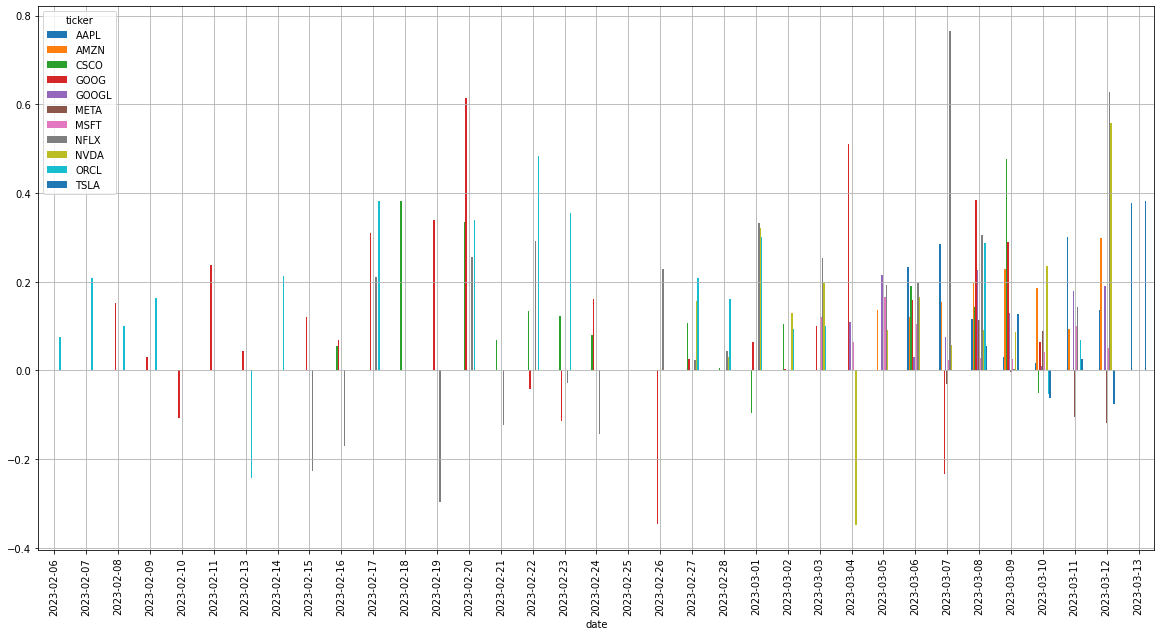

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
mean_scores = df_news.groupby(['ticker','date']).mean()
mean_scores = mean_scores.unstack()
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()